<h2><center>Sample Submission for IceBerg Detection</center></h2>

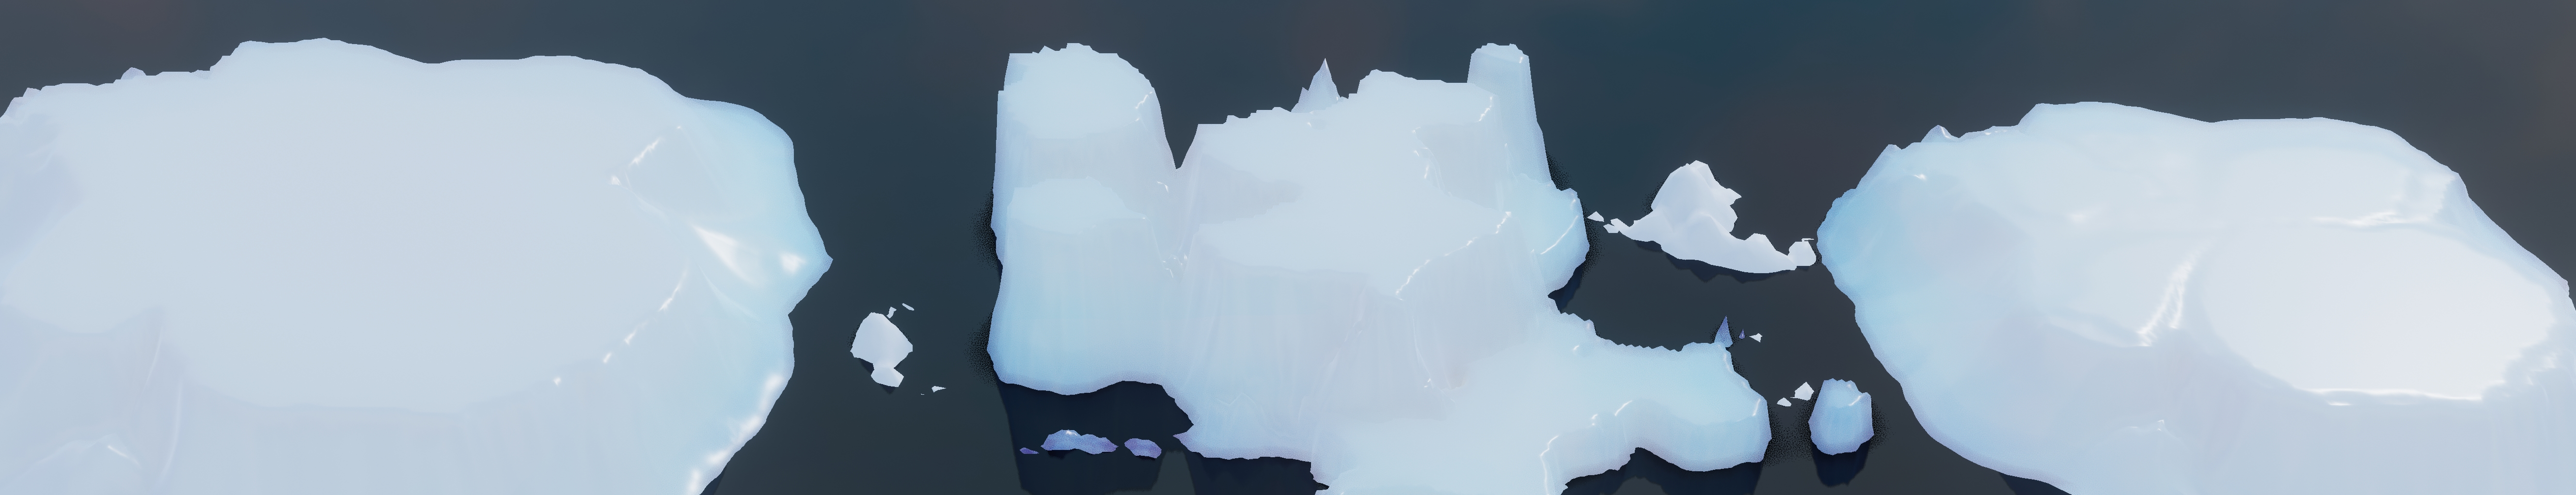

**Note : Create a copy of the notebook and use the copy for submission. Go to *File > Save a Copy in Drive* to create a new copy**

# Setup AIcrowd Utilities 🛠

In this section, we install AIcrowd and setup some environment variables will be be given during the evaluation of the notebook in clouds server. So you will need to keep this header as it is!

In [1]:
!pip install aicrowd-cli

%load_ext aicrowd.magic

## How to use this notebook? 📝

<p style="text-align: center"><img src="https://gitlab.aicrowd.com/aicrowd/assets/-/raw/master/notebook/aicrowd_notebook_submission_flow.png?inline=false" alt="notebook overview" style="width: 650px;"/></p>

- **Update the config parameters**. You can define the common variables here

Variable | Description
--- | ---
`AICROWD_DATASET_PATH` | Path to the file containing test data (The data will be available at `/data/` on aridhia workspace). This should be an absolute path.
`AICROWD_OUTPUTS_PATH` | Path to write the output to.
`AICROWD_ASSETS_DIR` | In case your notebook needs additional files (like model weights, etc.,), you can add them to a directory and specify the path to the directory here (please specify relative path). The contents of this directory will be sent to AIcrowd for evaluation.
`AICROWD_API_KEY` | In order to submit your code to AIcrowd, you need to provide your account's API key. This key is available at https://www.aicrowd.com/participants/me

- **Installing packages**. Please use the [Install packages 🗃](#Install-packages-🗃) section to install the packages
- **Training your models**. All the code within the [Training phase ⚙️](#Training-phase-⚙️) section will be skipped during evaluation. **Please make sure to save your model weights in the assets directory and load them in the predictions phase section** 

In [1]:
import os

# Please use the absolute for the location of the dataset.
# Or you can use relative path with `os.getcwd() + "test_data/test.csv"`
AICROWD_DATASET_PATH = os.getenv("DATASET_PATH", os.getcwd()+"/data/test")

# Output directory is where oyu save your predictions videos 
AICROWD_OUTPUTS_PATH = os.getenv("OUTPUTS_DIR", "")

# Assrts directory is where you can save your models to & read them during evaluation 
AICROWD_ASSETS_DIR = os.getenv("ASSETS_DIR", "assets")

# Install packages 🗃

Here we install all libraries that we need in this notebook. This is the section where internet connection is provided. 


**Note that all other sections don't have internet access so you won't be able to install any libraries in except this section.**

In [ ]:
# INSTALL YOUR PACKAGES

!pip install git+https://github.com/qubvel/segmentation_models.pytorch pytorch-argus scikit-video natsort
!pip install sk-video p-tqdm
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip install -U segmentation-models-pytorch albumentations --user

!pip install git+https://github.com/qubvel/segmentation_models.pytorch

# Installing Scikit Video & FFMPEG
!pip install scikit-video
!pip install ffmpeg
!apt-get install ffmpeg gstreamer1.0-libav vlc
!apt-get update -qq && sudo apt-get -y install \
  autoconf \
  automake \
  build-essential \
  cmake \
  git-core \
  libass-dev \
  libfreetype6-dev \
  libgnutls28-dev \
  libsdl2-dev \
  libtool \
  libva-dev \
  libvdpau-dev \
  libvorbis-dev \
  libxcb1-dev \
  libxcb-shm0-dev \
  libxcb-xfixes0-dev \
  meson \
  ninja-build \
  pkg-config \
  texinfo \
  wget \
  yasm \
  zlib1g-dev
!apt-get install ffmpeg libsm6  libxext6 -y
!pip install sk-video p-tqdm
!apt-get update
!apt-get install -y python3-opencv
!pip install --upgrade opencv
!pip install --upgrade torch torchvision

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-zjjsl6bj
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-zjjsl6bj
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-irjt8m3z
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-irjt8m3z
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-y34f66cr
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-y34f66cr
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
gstreamer1.0-libav is already the newest version (1.14.5-0ubuntu1~18.04.1).
vlc is already the newest version (3.0.8-0ubuntu18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.
Reading package lists... Done
Building dependency tre

# Define preprocessing code 💻

The code that is common between the training and the prediction sections should be defined here. During evaluation, we completely skip the training section. Please make sure to add any common logic between the training and prediction sections here.

In [2]:
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import shutil
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import albumentations as albu
from torch.utils.data import Dataset, DataLoader
from natsort import natsorted
import copy
import torch
device = torch.device('cpu')
import segmentation_models_pytorch as smp
import os
import numpy as np
from natsort import natsorted
from glob import glob
import cv2
import skvideo.io
from tqdm import tqdm
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
cv2.useOptimized()

True

# Training phase ⚙️

You can define your training code here. This sections will be skipped during evaluation. 


So, to read your model in Prediction Phrase, you can save your model in `assets` directory in this training phrase 

## Downloading Dataset

Hre we are downloading the challange dataset using AIcrowd CLI 

In [ ]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/h8GWk3B9oRFqoKInKZN6oNhHMAvtCc1BJN9NKgTyLuA
API Key valid
Saved API Key successfully!


In [ ]:
# Downloading the Dataset
!rm -rf data
!mkdir data
%aicrowd ds dl -c iceberg-detection -o data

# Unzipping the files
!unzip data/train.zip -d data/train > /dev/null
!unzip data/test.zip -d data/test > /dev/null

test.zip:   0%|          | 0.00/513k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/116M [00:00<?, ?B/s]

In [ ]:
# # YOUR TRAINING CODE
# def load_image_n_transform(img,upper_bright,lower_bright,upper_dark,lower_dark):
#   np_img              = np.array(img)
#   if np_img.mean()>200:
#     gray                = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)
#     canny               = cv2.Canny(gray, upper_bright,lower_bright)
#   else:
#     gray                = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)
#     canny               = cv2.Canny(gray, upper_dark,lower_dark)
#   contours, hierarchy = cv2.findContours(canny,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#   contours            = sorted(contours, key=cv2.contourArea)
#   return contours,np_img

# def get_parameters(contours,extent):
#   '''
#       Input the contours and the extent till which we need to extract bounding-boxes
#   '''

#   bounds = min(len(contours),extent)
#   x_axis = []
#   y_axis = []
#   width  = []
#   height = []
#   for i in range(1,bounds+1,1):
#     x,y,w,h = list(cv2.boundingRect(contours[-1*i]))
#     x_axis.append(x)
#     y_axis.append(y)
#     width.append(w)
#     height.append(h)
#   return (x_axis,y_axis,width,height)

# def get_optimal_parameters(contours,extent):
  
#   parameters   = get_parameters(contours,extent)
#   x_parameter  = np.array(parameters[0])
#   y_parameter  = np.array(parameters[1])
#   width_param  = np.array(parameters[2])
#   height_param = np.array(parameters[3])

#   length       = len(x_parameter)

#   x            = np.min(x_parameter)

#   y            = np.min(y_parameter)

#   width        = np.max(x_parameter+width_param)-x

#   height       = np.max(y_parameter+height_param)-y

#   return [x,y,x+width,y+height]

# def get_glaciers(image):
#   image             = cv2.resize(image,(200,200), interpolation = cv2.INTER_AREA)
#   contours,np_img   = load_image_n_transform(image,10,15,10,150)
#   if len(contours)>0:
    
#     parameters        = get_optimal_parameters(contours,6)

#     mask = np.zeros(image.shape[:2],np.uint8)

#     bgdModel = np.zeros((1,65),np.float64)

#     fgdModel = np.zeros((1,65),np.float64)

#     rect = (parameters[0],parameters[1],parameters[2]-parameters[0],parameters[3]-parameters[1])

#     cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
#     # cv2.grabCut(image,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

#     mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

#     img = image*mask2[:,:,np.newaxis]
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   else:
#     gray              = np.zeros(image.shape[:2],np.uint8)
#   gray = cv2.resize(gray,(512,512), interpolation = cv2.INTER_AREA)
#   return gray 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf assets
!mkdir assets
# To save your model, you can simply write any files in assets directory and read it back in Predictions phrase. 
# file = open(os.path.join("assets", 'model.h5'), 'w')
# file.write('my model')
# file.close()


ENCODER         = 'mobilenet_v2'
ENCODER_WEIGHTS = 'imagenet'

ACTIVATION      = 'sigmoid' 
DEVICE          = 'cpu'

# create segmentation model with pretrained encoder
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=1, 
    activation=ACTIVATION,
    # encoder_depth=5
)



preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

PATH = '/content/drive/MyDrive/best_model.pt'
model.load_state_dict(torch.load(PATH, map_location=DEVICE))

PATH2SAVE = '/content/assets/best_model_param.pt'
torch.save(model.state_dict(), PATH2SAVE)
torch.save(model,'/content/assets/best_model.pt')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

# Prediction phase 🔎

Generating the videos for the test data. 

Make sure you save each video in the `AICROWD_OUTPUTS_PATH`. 

In [3]:
# For example, now you can read your model back
# file = open(os.path.join("assets", 'model.h5'), 'r')
# file.read()
# PATH = os.path.join("assets",'best_model.pt')
PATH_model  = AICROWD_ASSETS_DIR + '/best_model.pt'
PATH_params = AICROWD_ASSETS_DIR + '/best_model_param.pt'
h = 256
w = 256

ENCODER         = 'mobilenet_v2'
ENCODER_WEIGHTS = 'imagenet'

ACTIVATION      = 'sigmoid' 
DEVICE          = 'cpu'

model = torch.load(PATH_model)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)


model.load_state_dict(copy.deepcopy(torch.load(PATH_params, map_location=DEVICE)))


<All keys matched successfully>

### Generating Random segmentation videos

Here we will make a random video with the specifications need in the submsision. 

In [4]:
def preprocess(image):
  
  image_needed             = image
  image_needed             = cv2.resize(image_needed,(h,w), interpolation = cv2.INTER_AREA)
  image                    = cv2.cvtColor(image_needed, cv2.COLOR_BGR2RGB)
    
  mask                     = np.zeros((h,w,1))
  sample                   = get_preprocessing(preprocessing_fn)(image = image,mask=mask)
  image,mask               = sample['image'],sample['mask']
  return image
  
  
def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')





def get_glaciers(image):
  
  image    = preprocess(image)
  x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
  pr_mask  = model.predict(x_tensor)
  pr_mask  = (pr_mask.squeeze().cpu().numpy().round())
  pr_mask  = cv2.resize(pr_mask,(512,512),cv2.INTER_AREA)
  pr_mask  = pr_mask*255
  _,img    = cv2.threshold(pr_mask, 128, 255, cv2.THRESH_BINARY)
  img      = Image.fromarray(img.astype(np.uint8))
  return img  

def gen_video(i):
    image_file_clear = AICROWD_DATASET_PATH+f'/image_{str(i)}.mp4'

    ######### Reading Images and performing preprocessing 
    clear_video_frame = {}
    image_video_clear = cv2.VideoCapture(image_file_clear)
    
    ret               = True
    count             = 1
    while ret:
        ret,frame     = image_video_clear.read()
        if ret ==True:
            clear_video_frame[count] = get_glaciers(frame)
        count = count+1

    ###### Writing images to given location 
    writer = skvideo.io.FFmpegWriter(os.path.join(AICROWD_OUTPUTS_PATH,  f"segmentation_{i}.mp4"), outputdict={
        '-vcodec': 'libx264',  
        '-crf': '0',          
        '-preset':'veryslow'  
        }) 
    for n in range(1, 24):      
      image = clear_video_frame[n] 
      
      writer.writeFrame(image)

    writer.close()
    # return clear_video_frame

In [ ]:
# Generating the samples

[gen_video(i) for i in  range(len(os.listdir(AICROWD_DATASET_PATH)))]


# Submit to AIcrowd 🚀

Submitting the notebook in AIcrowd challenge 

Using notebook: /content/drive/MyDrive/Colab Notebooks/model_ready_problem4_aiblitz10_submission for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
ERROR    Error while reading the git config,                                    
submission.zip ━━━━━━━━━━━━━━━━━━━━ 100.0% • 112.7/112.7 MB • 2.5 MB/s • 0:00:00
                                                  ╭─────────────────────────╮                                                  
                                                  │ Successfully submitted! │                                                  
                                                  ╰─────────────────────────╯                                                  
                                                        Important links                                                        
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────